In [2]:
import pandas as pd
ames_housing = pd.read_csv("../datasets/house_prices.csv", na_values="?")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

In [3]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

In [4]:
data_numerical.head(10)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,2,548,0,61,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,1,2,460,298,0,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,1,2,608,0,42,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,1,3,642,0,35,272,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,1,3,836,192,84,0,0,0,0,0
5,85.0,14115,0.0,732,0,64,796,796,566,0,...,0,2,480,40,30,0,320,0,0,700
6,75.0,10084,186.0,1369,0,317,1686,1694,0,0,...,1,2,636,255,57,0,0,0,0,0
7,NaN,10382,240.0,859,32,216,1107,1107,983,0,...,2,2,484,235,204,228,0,0,0,350
8,51.0,6120,0.0,0,0,952,952,1022,752,0,...,2,2,468,90,0,205,0,0,0,0
9,50.0,7420,0.0,851,0,140,991,1077,0,0,...,2,1,205,0,4,0,0,0,0,0


# Question 1

$R^2$ score on linear regression and decision tree

https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/assessing-fit-least-squares-regression/v/residual-plots

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

model1 = make_pipeline(StandardScaler(), SimpleImputer(strategy="mean"), LinearRegression())
model2 = make_pipeline(SimpleImputer(strategy="mean"), DecisionTreeRegressor())

score1 = cross_val_score(model1, data_numerical, target, cv=10)
score2 = cross_val_score(model2, data_numerical, target, cv=10)


In [6]:
score1.mean(), score2.mean()

(0.7188869075060064, 0.6110308984815396)

Regression tree is better, at least in terms of the $R^2$ metric.

# Question 2 and 3

In [31]:
model2.get_params()

{'memory': None,
 'steps': [('simpleimputer', SimpleImputer()),
  ('decisiontreeregressor', DecisionTreeRegressor())],
 'verbose': False,
 'simpleimputer': SimpleImputer(),
 'decisiontreeregressor': DecisionTreeRegressor(),
 'simpleimputer__add_indicator': False,
 'simpleimputer__copy': True,
 'simpleimputer__fill_value': None,
 'simpleimputer__missing_values': nan,
 'simpleimputer__strategy': 'mean',
 'simpleimputer__verbose': 0,
 'decisiontreeregressor__ccp_alpha': 0.0,
 'decisiontreeregressor__criterion': 'mse',
 'decisiontreeregressor__max_depth': None,
 'decisiontreeregressor__max_features': None,
 'decisiontreeregressor__max_leaf_nodes': None,
 'decisiontreeregressor__min_impurity_decrease': 0.0,
 'decisiontreeregressor__min_impurity_split': None,
 'decisiontreeregressor__min_samples_leaf': 1,
 'decisiontreeregressor__min_samples_split': 2,
 'decisiontreeregressor__min_weight_fraction_leaf': 0.0,
 'decisiontreeregressor__random_state': None,
 'decisiontreeregressor__splitter': 'b

In [32]:
from sklearn.model_selection import GridSearchCV
import numpy as np

params = {"decisiontreeregressor__max_depth": np.arange(1.,15.1)}
gscv = GridSearchCV(model2, params, cv=10)
gscv.fit(data_numerical, target)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15.])})

In [39]:
gscv.cv_results_['mean_test_score']

array([0.35440276, 0.49531434, 0.58521053, 0.66252611, 0.67918631,
       0.69144453, 0.69757473, 0.66096048, 0.65123513, 0.66779451,
       0.62321427, 0.62793173, 0.61250827, 0.61713655, 0.62074722])

In [35]:
pd.DataFrame({'max_depth': params["decisiontreeregressor__max_depth"],
              'mean R^2': gscv.cv_results_['mean_test_score']})

,max_depth,mean R^2
0,1.0,0.354403
1,2.0,0.495314
2,3.0,0.585211
3,4.0,0.662526
4,5.0,0.679186
5,6.0,0.691445
6,7.0,0.697575
7,8.0,0.660960
8,9.0,0.651235
9,10.0,0.667795


Best $R^2$ scores are around max_depth = 5 or 6.

MOOC's solution:

In [36]:
from sklearn.model_selection import cross_validate

cv_results_tree_optimal_depth = cross_validate(
    gscv, data_numerical, target, cv=10, return_estimator=True, n_jobs=2,
)
cv_results_tree_optimal_depth["test_score"].mean()

0.6964438917023054

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max depth'>

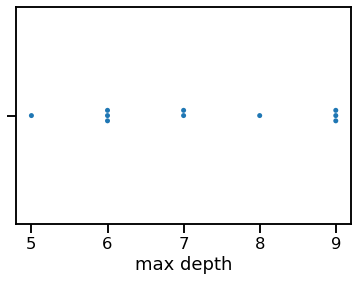

In [38]:
import seaborn as sns
sns.set_context("talk")

max_depth = [
    estimator.best_params_["decisiontreeregressor__max_depth"]
    for estimator in cv_results_tree_optimal_depth["estimator"]
]
max_depthDS = pd.Series(max_depth, name="max depth")
sns.swarmplot(max_depthDS)

# Question 4

In [18]:
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder

selector = make_column_selector()

preproc = ColumnTransformer([
    ('num', SimpleImputer(strategy="mean"), make_column_selector(dtype_exclude=object)(data)),
    ('cat', make_pipeline(SimpleImputer(strategy="most_frequent"), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)), make_column_selector(dtype_include=object)(data))
])

model = make_pipeline(preproc, DecisionTreeRegressor())

cv_res = cross_val_score(model, data, target, cv=10)





In [20]:
cv_res.mean() # R^2

0.7451711210377678